<a href="https://colab.research.google.com/github/MelquiasRibeiro/Trasnformacao_visualizacao_de_dados/blob/master/fire_in_the_playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#carregando as libs
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import plotly.express as px
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
import geopandas as gpd
import matplotlib.pyplot as plt



In [37]:
#usando o  'read_csv' da pandas para carregar os dados
amazon_df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/amazon_O_Corrigido.csv', encoding='latin1')
#Verificando se foi carregado corretamente(visualizando as 10 primieras linhas)
amazon_df.head(10)


,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
5,2003,Acre,Janeiro,10.0,2003-01-01
6,2004,Acre,Janeiro,0.0,2004-01-01
7,2005,Acre,Janeiro,12.0,2005-01-01
8,2006,Acre,Janeiro,4.0,2006-01-01
9,2007,Acre,Janeiro,0.0,2007-01-01


In [10]:
#confirindo o tamanho do dataFrame(max linhas)
len(amazon_df)

6454

In [11]:
#verificando possiveis "erros"(linhas faltando ou valores nulos)  em cada uma das colunas 
amazon_df.isna().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [12]:
#Verificando se temos valores unicos na coluna "state"
amazon_df.state.unique()


array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)

In [13]:
#Verificando se temos valores unicos na coluna "month"
amazon_df.month.unique()


array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [14]:
#analisando as estatisticas sobre os dados de incendios informados
amazon_df.number.describe()

count    6454.000000
mean      108.293163
std       190.812242
min         0.000000
25%         3.000000
50%        24.000000
75%       113.000000
max       998.000000
Name: number, dtype: float64

In [15]:
#numero de incendios reportados o periodo coletado
amazon_df.number.sum()

698924.073

In [17]:
#crinado uma coluna com os dados do tipo "Date" e Indexando os dados 
amazon_df['Year']=pd.DatetimeIndex(amazon_df['date']).year
#verficando se funcionou 
amazon_df.Year.unique()

,year,state,month,number,date,Year
0,1998,Acre,Janeiro,0.0,1998-01-01,1998
1,1999,Acre,Janeiro,0.0,1999-01-01,1999
2,2000,Acre,Janeiro,0.0,2000-01-01,2000
3,2001,Acre,Janeiro,0.0,2001-01-01,2001
4,2002,Acre,Janeiro,0.0,2002-01-01,2002


In [18]:
#excluindo a antiga coluna de Year
amazon_df.drop(columns=['date', 'year'], axis=1, inplace=True)
#reordenando as colunas do nosso dataframe
amazon_df=amazon_df[['state','number','month','Year']]
#mudado o nome das colunas do dataFrame
amazon_df.rename(columns={'state': 'State', 'number': 'Fire_Number', 'month': 'Month'}, inplace=True)
#verificando as mudanças
amazon_df.head()

,State,Fire_Number,Month,Year
0,Acre,0.0,Janeiro,1998
1,Acre,0.0,Janeiro,1999
2,Acre,0.0,Janeiro,2000
3,Acre,0.0,Janeiro,2001
4,Acre,0.0,Janeiro,2002


In [19]:
#ciando uma lista de anos com os anos disponiveis no dataFrame 
years=list(amazon_df.Year.unique())
#crinado uma lista que ser preenchida com os dados dos reports de incendio
sub_fires_per_year=[]
#populando a lista com os dados
for i in years:
    y=amazon_df.loc[amazon_df['Year']==i].Fire_Number.sum().round(0)
    sub_fires_per_year.append(y)
#relacionando os dados com um dicionario
fire_year_dic={'Year':years,'Total_Fires':sub_fires_per_year}
#organizando os dados em um  novo dataFrame para plotar um grafico de ReportsXAno
time_plot_1_df=pd.DataFrame(fire_year_dic)
#Verificando o daframe
time_plot_1_df.head(5)

,Year,Total_Fires
0,1998,20014.0
1,1999,26883.0
2,2000,27351.0
3,2001,29072.0
4,2002,37391.0


In [20]:
#usando a biblioteca "plotly Scatter " para plotar nosso grafico
time_plot_1=go.Figure(go.Scatter(x=time_plot_1_df.Year, y=time_plot_1_df.Total_Fires,
                                 mode='lines+markers', line={'color': 'red'}))
#definiçoes de titulo e "legenda" dos eixos
time_plot_1.update_layout(title='Incendios flosrestais no Brasil reportados entre 1998 e 2017 ',
                   xaxis_title='Anos',
                   yaxis_title='Incendios reportados')
#exibindo o gráfico
time_plot_1.show()

In [0]:
#crinado uma lista com estados do DataFreme
states=list(amazon_df.State.unique())
#criando uma lista para cada estado
acre_list=[]
alagoas_list=[] 
amapa_list=[] 
amazonas_list=[] 
bahia_list=[] 
ceara_list=[]
distrito_list=[] 
espirito_list=[] 
goias_list=[] 
maranhao_list=[] 
mato_list=[] 
minas_list=[]
para_list=[] 
paraiba_list=[] 
perna_list=[]
piau_list=[]
rio_list=[]
rondonia_list=[]
roraima_list=[]
santa_list=[]
sao_list=[]
sergipe_list=[]
tocantins_list=[]


In [0]:
#adcionando os dados nas lista dos estados
for x in states:
    st=x
    for i in years:
        ye=i
        if st=='Acre':
            y=amazon_df.loc[(amazon_df['State']== st) & (amazon_df['Year']== ye)].Fire_Number.sum().round(0)
            acre_list.append(y)
        elif st=='Alagoas':
            y=amazon_df.loc[(amazon_df['State']== st) & (amazon_df['Year']== ye)].Fire_Number.sum().round(0)
            alagoas_list.append(y)
        elif st=='Amazonas':
            y=amazon_df.loc[(amazon_df['State']== st) & (amazon_df['Year']== ye)].Fire_Number.sum().round(0)
            amazonas_list.append(y)
        elif st=='Amapa':
            y=amazon_df.loc[(amazon_df['State']== st) & (amazon_df['Year']== ye)].Fire_Number.sum().round(0)
            amapa_list.append(y)
        elif st=='Bahia':
            y=amazon_df.loc[(amazon_df['State']== st) & (amazon_df['Year']== ye)].Fire_Number.sum().round(0)
            bahia_list.append(y)
        elif st=='Ceara':
            y=amazon_df.loc[(amazon_df['State']== st) & (amazon_df['Year']== ye)].Fire_Number.sum().round(0)
            ceara_list.append(y)
        elif st=='Distrito Federal':
            y=amazon_df.loc[(amazon_df['State']== st) & (amazon_df['Year']== ye)].Fire_Number.sum().round(0)
            distrito_list.append(y)
        elif st=='Espirito Santo':
            y=amazon_df.loc[(amazon_df['State']== st) & (amazon_df['Year']== ye)].Fire_Number.sum().round(0)
            espirito_list.append(y)
        elif st=='Goias':
            y=amazon_df.loc[(amazon_df['State']== st) & (amazon_df['Year']== ye)].Fire_Number.sum().round(0)
            goias_list.append(y)
        elif st=='Maranhao':
            y=amazon_df.loc[(amazon_df['State']== st) & (amazon_df['Year']== ye)].Fire_Number.sum().round(0)
            maranhao_list.append(y)
        elif st=='Mato Grosso':
            y=amazon_df.loc[(amazon_df['State']== st) & (amazon_df['Year']== ye)].Fire_Number.sum().round(0)
            mato_list.append(y)
        elif st=='Minas Gerais':
            y=amazon_df.loc[(amazon_df['State']== st) & (amazon_df['Year']== ye)].Fire_Number.sum().round(0)
            minas_list.append(y)
        elif st=='Pará':
            y=amazon_df.loc[(amazon_df['State']== st) & (amazon_df['Year']== ye)].Fire_Number.sum().round(0)
            para_list.append(y)
        elif st=='Paraiba':
            y=amazon_df.loc[(amazon_df['State']== st) & (amazon_df['Year']== ye)].Fire_Number.sum().round(0)
            paraiba_list.append(y)
        elif st=='Pernambuco':
            y=amazon_df.loc[(amazon_df['State']== st) & (amazon_df['Year']== ye)].Fire_Number.sum().round(0)
            perna_list.append(y)
        elif st=='Piau':
            y=amazon_df.loc[(amazon_df['State']== st) & (amazon_df['Year']== ye)].Fire_Number.sum().round(0)
            piau_list.append(y)
        elif st=='Rio':
            y=amazon_df.loc[(amazon_df['State']== st) & (amazon_df['Year']== ye)].Fire_Number.sum().round(0)
            rio_list.append(y)
        elif st=='Rondonia':
            y=amazon_df.loc[(amazon_df['State']== st) & (amazon_df['Year']== ye)].Fire_Number.sum().round(0)
            rondonia_list.append(y)
        elif st=='Roraima':
            y=amazon_df.loc[(amazon_df['State']== st) & (amazon_df['Year']== ye)].Fire_Number.sum().round(0)
            roraima_list.append(y)
        elif st=='Santa Catarina':
            y=amazon_df.loc[(amazon_df['State']== st) & (amazon_df['Year']== ye)].Fire_Number.sum().round(0)
            santa_list.append(y)
        elif st=='Sao Paulo':
            y=amazon_df.loc[(amazon_df['State']== st) & (amazon_df['Year']== ye)].Fire_Number.sum().round(0)
            sao_list.append(y)
        elif st=='Sergipe':
            y=amazon_df.loc[(amazon_df['State']== st) & (amazon_df['Year']== ye)].Fire_Number.sum().round(0)
            sergipe_list.append(y)
        elif st=='Tocantins':
            y=amazon_df.loc[(amazon_df['State']== st) & (amazon_df['Year']== ye)].Fire_Number.sum().round(0)
            tocantins_list.append(y)

In [23]:
#Criando um novo data frame com todas as lista criadas
time_plot_2_df=pd.DataFrame(list(zip(years, acre_list, alagoas_list, amapa_list, amazonas_list,
                                     bahia_list, ceara_list, distrito_list, espirito_list,
                                     goias_list, maranhao_list, mato_list, minas_list, para_list,
                                     paraiba_list, perna_list, piau_list, rio_list, rondonia_list,
                                     roraima_list, santa_list, sao_list, sergipe_list, tocantins_list)),
                            columns =['Year', 'Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
                                      'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
                                      'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
                                      'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
                                      'Sao Paulo', 'Sergipe', 'Tocantins'])
# verificando se deu certo
time_plot_2_df.head(10)

,Year,Acre,Alagoas,Amapa,Amazonas,Bahia,Ceara,Distrito Federal,Espirito Santo,Goias,Maranhao,Mato Grosso,Minas Gerais,Pará,Paraiba,Pernambuco,Piau,Rio,Rondonia,Roraima,Santa Catarina,Sao Paulo,Sergipe,Tocantins
0,1998,730.0,86.0,278.0,946.0,1225.0,1612.0,103.0,218.0,750.0,366.0,2401.0,1233.0,716.0,816.0,767.0,1494.0,1149.0,916.0,21.0,59.0,3196.0,20.0,913.0
1,1999,333.0,172.0,101.0,1061.0,1198.0,1688.0,46.0,240.0,1910.0,1276.0,2979.0,997.0,2192.0,3437.0,463.0,2015.0,1030.0,209.0,220.0,364.0,4249.0,93.0,608.0
2,2000,434.0,123.0,253.0,853.0,1379.0,2211.0,48.0,175.0,2516.0,1244.0,3897.0,1493.0,794.0,2804.0,691.0,1112.0,650.0,868.0,362.0,306.0,4128.0,17.0,994.0
3,2001,828.0,86.0,1301.0,1297.0,2428.0,1848.0,64.0,130.0,2066.0,720.0,3088.0,2139.0,835.0,2073.0,1080.0,731.0,857.0,1004.0,1309.0,200.0,2926.0,24.0,2039.0
4,2002,1544.0,258.0,862.0,2852.0,2281.0,454.0,149.0,297.0,1619.0,530.0,3666.0,1950.0,1266.0,2249.0,1909.0,1504.0,2945.0,1452.0,2224.0,1715.0,3539.0,208.0,1919.0
5,2003,947.0,299.0,1652.0,1524.0,3076.0,796.0,96.0,708.0,2079.0,962.0,6940.0,1824.0,1073.0,2797.0,2431.0,1964.0,3438.0,1465.0,1789.0,1609.0,3306.0,403.0,1582.0
6,2004,1184.0,159.0,2261.0,2298.0,1644.0,383.0,279.0,174.0,1799.0,1197.0,4811.0,2141.0,1075.0,2761.0,1683.0,1778.0,3437.0,920.0,1457.0,2955.0,2864.0,190.0,1003.0
7,2005,984.0,217.0,1271.0,1657.0,2358.0,680.0,92.0,121.0,1709.0,1184.0,5387.0,1647.0,501.0,3427.0,1520.0,2211.0,2297.0,1678.0,860.0,1483.0,2123.0,200.0,1398.0
8,2006,1221.0,161.0,817.0,998.0,2509.0,1109.0,76.0,215.0,1294.0,924.0,4286.0,2464.0,1183.0,3308.0,1268.0,2358.0,2501.0,680.0,1245.0,1855.0,2209.0,147.0,1002.0
9,2007,1213.0,128.0,440.0,590.0,2210.0,1712.0,274.0,382.0,888.0,1911.0,3516.0,1214.0,1833.0,2665.0,1631.0,2714.0,2067.0,396.0,1863.0,1230.0,1877.0,124.0,2160.0


In [24]:
#Top 10 estados
time_plot_2_df.sum().nlargest(11)

Mato Grosso     96245.0
Paraiba         52437.0
Sao Paulo       51120.0
Rio             45160.0
Bahia           44747.0
Year            40150.0
Piau            37805.0
Goias           37694.0
Minas Gerais    37475.0
Tocantins       33707.0
Amazonas        30652.0
dtype: float64

In [25]:
#criando um data frame para o grafico de barras
bar_plot_df=pd.DataFrame(time_plot_2_df.sum().nlargest(11))
#resetando os numeros de indx no novo data frame 
bar_plot_df=bar_plot_df.reset_index()
#renomeando as colunas
bar_plot_df.rename(columns={'index':'State', 0:'Reported_Fires'}, inplace=True)
#removendo as informaçoes de ano
bar_plot_df.drop(bar_plot_df[bar_plot_df.State == 'Year'].index, inplace=True)
#verificando 
bar_plot_df

,State,Reported_Fires
0,Mato Grosso,96245.0
1,Paraiba,52437.0
2,Sao Paulo,51120.0
3,Rio,45160.0
4,Bahia,44747.0
6,Piau,37805.0
7,Goias,37694.0
8,Minas Gerais,37475.0
9,Tocantins,33707.0
10,Amazonas,30652.0


In [27]:
#usando a biblioteca "plotly Scatter " para plotar nosso grafico
bar_plot=px.bar(bar_plot_df, x='State', y='Reported_Fires', color='Reported_Fires',
           labels={'Reported_Fires':'InCendios reportados ', 'State':'Estado'}, color_continuous_scale='Reds')
#titulo
bar_plot.update_layout(xaxis_tickangle=-45, title_text='Top 10 estados em número de incendios reportados')
#exibindo o grafico
bar_plot.show()

In [0]:
#criando um dicionarios de latitude e longitude dos estados para criar o mapa
latitude={'Acre':-9.02,'Alagoas':-9.57,'Amapa':02.05,'Amazonas':-5.00,'Bahia':-12.00,'Ceara':-5.00,
          
          'Distrito Federal':-15.45,'Espirito Santo':-20.00,'Goias':-15.55,'Maranhao':-5.00,'Mato Grosso':-14.00
          
          ,'Minas Gerais':-18.50,'Pará':-3.20,'Paraiba':-7.00,'Pernambuco':-8.00,'Piau':-7.00,'Rio':-22.90,
          
          'Rondonia':-11.00,'Roraima':-2.00,'Santa Catarina':-27.25,'Sao Paulo':-23.32,'Sergipe':-10.30,
         
         'Tocantins':-10.00
         }


longitude={
    'Acre':-70.8120,'Alagoas':-36.7820,'Amapa':-50.50,'Amazonas':-65.00,'Bahia':-42.00,'Ceara':-40.00,
    
    'Distrito Federal':-47.45,'Espirito Santo':-40.45,'Goias':-50.10,'Maranhao':-46.00,'Mato Grosso':-55.00,
    
    'Minas Gerais':-46.00,'Pará':-52.00,'Paraiba':-36.00,'Pernambuco':-37.00,'Piau':-73.00, 'Rio':-43.17,
    
    'Rondonia':-63.00,'Roraima':-61.30,'Santa Catarina':-48.30,'Sao Paulo':-46.37,'Sergipe':-37.30,
    
    'Tocantins':-48.00
}

In [38]:
#adicionando as coluans de latirude e longitude no dataFrame original(carregar novamete o bloco 1)
amazon_df['latitude']=amazon_df['state'].map(latitude)
amazon_df['longitude']=amazon_df['state'].map(longitude)
amazon_df

,year,state,month,number,date,latitude,longitude
0,1998,Acre,Janeiro,0.0,1998-01-01,-9.02,-70.812
1,1999,Acre,Janeiro,0.0,1999-01-01,-9.02,-70.812
2,2000,Acre,Janeiro,0.0,2000-01-01,-9.02,-70.812
3,2001,Acre,Janeiro,0.0,2001-01-01,-9.02,-70.812
4,2002,Acre,Janeiro,0.0,2002-01-01,-9.02,-70.812
...,...,...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01,-10.00,-48.000
6450,2013,Tocantins,Dezembro,85.0,2013-01-01,-10.00,-48.000
6451,2014,Tocantins,Dezembro,223.0,2014-01-01,-10.00,-48.000
6452,2015,Tocantins,Dezembro,373.0,2015-01-01,-10.00,-48.000


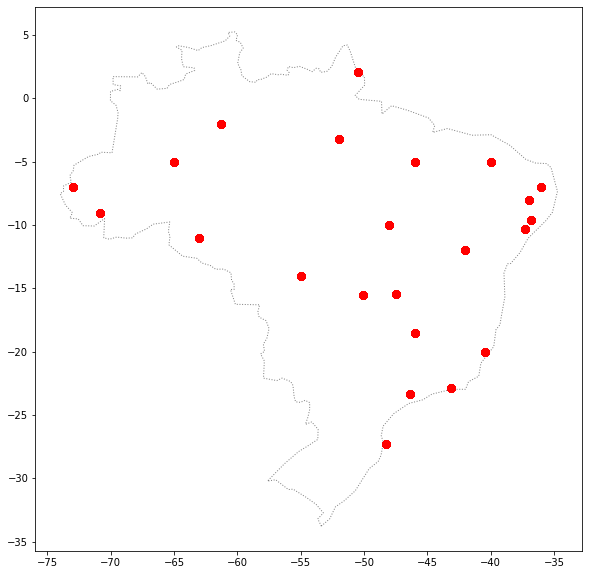

In [39]:
#criando o mapa

fire_file_gpd=gpd.GeoDataFrame(amazon_df,geometry=gpd.points_from_xy(amazon_df['longitude'],amazon_df['latitude']))
fire_file_gpd.crs={'init':'epsg:4326'}

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
americas = world.loc[world['continent'].isin([ 'South America'])]
americas=americas.loc[americas['name']=='Brazil']

ax = americas.plot(figsize=(10,10), color='white', linestyle=':', edgecolor='gray')
fire_file_gpd.plot(ax=ax, markersize=50,color='red')